## 【第13回Python流体の数値計算】2次元バーガース方程式をGoogle Colabでアニメーション作成する。

### https://takun-physics.net/9980/

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#条件設定
nx = 41
ny = 41
nt = 120
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

#初期状態の設定
u = np.ones((ny, nx)) 
v = np.ones((ny, nx))
un = np.ones((ny, nx)) 
vn = np.ones((ny, nx))
comb = np.ones((ny, nx))


u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

Text(0.5, 0.5, '$y$')

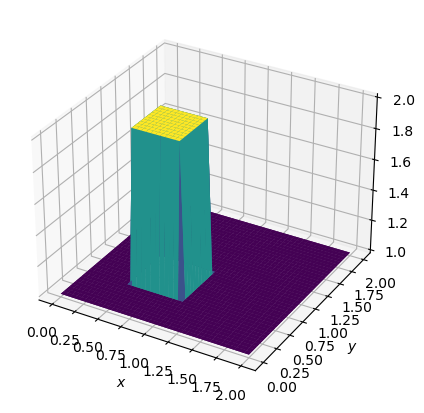

In [4]:
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [5]:
for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                     dt / dy * vn[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                     nu * dt / dy**2 * 
                     (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                     dt / dx * un[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     dt / dy * vn[1:-1, 1:-1] * 
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     nu * dt / dy**2 *
                     (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
     
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

Text(0.5, 0.5, '$y$')

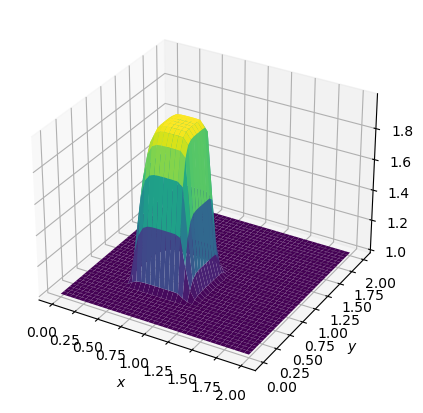

In [7]:
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=1, cstride=1)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

## バーガーズ方程式を動画出力

CPU times: user 7.76 ms, sys: 2.57 ms, total: 10.3 ms
Wall time: 9.02 ms


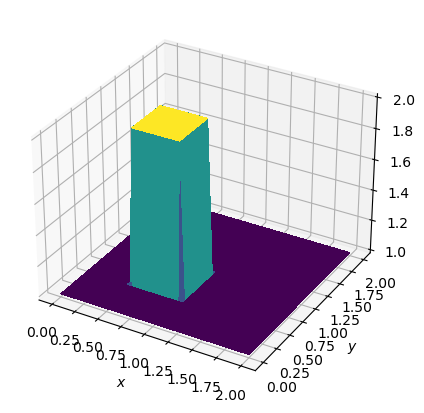

In [11]:
%%time
import numpy as np
from matplotlib import pyplot as pyplot
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

#条件設定
nx = 41
ny = 41
nt = 120
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

#初期状態の設定
u = np.ones((ny, nx)) 
v = np.ones((ny, nx))
un = np.ones((ny, nx)) 
vn = np.ones((ny, nx))
comb = np.ones((ny, nx))


u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(x, y)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,linewidth=0, antialiased=False)

# バーガーズ方程式（拡散項を関数化）
def diffuse(nt):
  un = u.copy()
  vn = v.copy()

  u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                     dt / dy * vn[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                     nu * dt / dy**2 * 
                     (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    
  v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                     dt / dx * un[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     dt / dy * vn[1:-1, 1:-1] * 
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     nu * dt / dy**2 *
                     (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
     
  u[0, :] = 1
  u[-1, :] = 1
  u[:, 0] = 1
  u[:, -1] = 1
    
  v[0, :] = 1
  v[-1, :] = 1
  v[:, 0] = 1
  v[:, -1] = 1

# プロット    
  ax.set_title('time = '+ str(round(nt*dt,3))+ 'sec, '+ str(nt)+'step')
  
  ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,linewidth=0, antialiased=True)

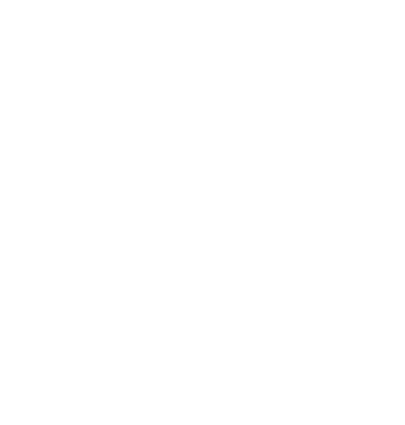

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# 以前のコードと同じ処理

# 初期化関数
def init():
    ax.clear()
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$u$')
    ax.set_title('time = 0 sec, 0 step')
    return ax,

# アニメーションの更新関数
def update(nt):
    diffuse(nt)
    return ax,

# アニメーションの作成
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(projection='3d')
ani = FuncAnimation(fig, update, frames=range(nt), init_func=init, blit=True)

# 動画の保存
# ani.save('diffusion_animation.mp4', writer='ffmpeg', fps=30)

# 動画の保存（GIF形式）
ani.save('diffusion_animation.gif', writer='pillow', fps=30)

# グラフの表示
plt.show()


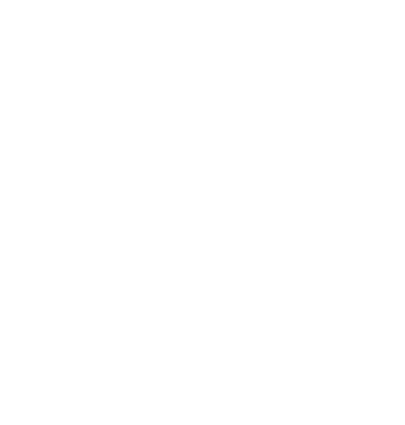

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# 以前のコードと同じ処理

# 初期化関数
def init():
    ax.clear()
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$u$')
    ax.set_title('time = 0 sec, 0 step')
    return ax,

# アニメーションの更新関数
def update(nt):
    diffuse(nt)
    return ax,

# アニメーションの作成
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(projection='3d')
ani = FuncAnimation(fig, update, frames=range(nt), init_func=init, blit=True)

# 動画の保存
ani.save('diffusion_animation.mp4', writer='ffmpeg', fps=30)

# 動画の保存（GIF形式）
# ani.save('diffusion_animation.gif', writer='pillow', fps=30)

# グラフの表示
plt.show()



TypeError: Animation._draw_next_frame() missing 2 required positional arguments: 'framedata' and 'blit'

Error in callback <function _draw_all_if_interactive at 0x107e50cc0> (for post_execute):


TypeError: Animation._draw_next_frame() missing 2 required positional arguments: 'framedata' and 'blit'

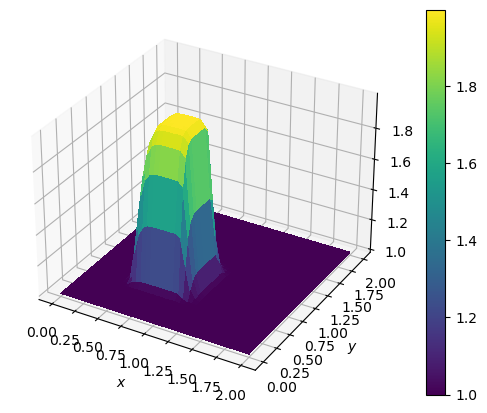

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# 既存のコードをそのまま使う

# 関数diffuseにanimを引数として追加する
def diffuse(nt, anim):
    # 既存の関数diffuseのコードをそのまま使う
    un = u.copy()
    vn = v.copy()

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                        dt / dx * un[1:-1, 1:-1] * 
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                        dt / dy * vn[1:-1, 1:-1] * 
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                        nu * dt / dx**2 * 
                        (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                        nu * dt / dy**2 * 
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                        dt / dx * un[1:-1, 1:-1] *
                        (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        dt / dy * vn[1:-1, 1:-1] * 
                        (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                        nu * dt / dx**2 * 
                        (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        nu * dt / dy**2 *
                        (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
        
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
        
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
    
    # アニメーションフレームを更新
    anim._draw_next_frame()

# アニメーションを作成
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)

# カラーバーを設定
fig.colorbar(surf)

# アニメーションを作成するFuncAnimationオブジェクト
ani = FuncAnimation(fig, diffuse, frames=nt, fargs=(ani,), blit=False)

# 動画を保存
ani.save('burgers_equation_animation.mp4', writer='ffmpeg', fps=30)

plt.show()


/Users/taku/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


NameError: name 'anim' is not defined

Error in callback <function _draw_all_if_interactive at 0x107e50cc0> (for post_execute):


NameError: name 'anim' is not defined

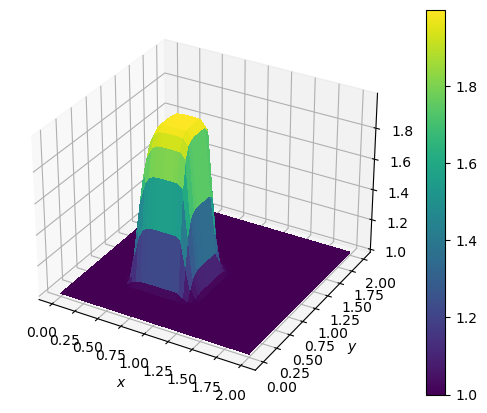

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# 条件設定と初期状態の設定を行う部分は省略

# 関数diffuseにframedata, ntを追加する
def diffuse(frame, framedata, nt):
    # 既存の関数diffuseのコードをそのまま使う
    # ここでframeは現在のフレーム数です
    # ntは繰り返し回数であり、アニメーションの終了条件となります
    # framedataは空の辞書型オブジェクトですが、この関数では使いません
    
    un = u.copy()
    vn = v.copy()

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                        dt / dx * un[1:-1, 1:-1] * 
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                        dt / dy * vn[1:-1, 1:-1] * 
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                        nu * dt / dx**2 * 
                        (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                        nu * dt / dy**2 * 
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                        dt / dx * un[1:-1, 1:-1] *
                        (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        dt / dy * vn[1:-1, 1:-1] * 
                        (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                        nu * dt / dx**2 * 
                        (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        nu * dt / dy**2 *
                        (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
        
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
        
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
    
    # アニメーションフレームを更新
    anim._draw_next_frame()
    
    
# アニメーションを作成
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)

# カラーバーを設定
fig.colorbar(surf)

# アニメーションを作成するFuncAnimationオブジェクト
ani = FuncAnimation(fig, diffuse, fargs=(None, nt), frames=nt, interval=50)

# 動画を保存
ani.save('burgers_equation_animation.mp4', writer='ffmpeg', fps=30)

plt.show()


TypeError: diffuse() takes 2 positional arguments but 3 were given

Error in callback <function _draw_all_if_interactive at 0x107e50cc0> (for post_execute):


TypeError: diffuse() takes 2 positional arguments but 3 were given

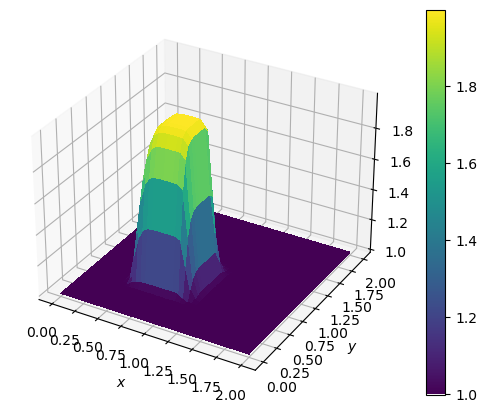

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# 条件設定と初期状態の設定を行う部分は省略

# 関数diffuseにframedata, ntを追加する
def diffuse(frame, nt):
    # 既存の関数diffuseのコードをそのまま使う
    # ここでframeは現在のフレーム数です
    # ntは繰り返し回数であり、アニメーションの終了条件となります
    # framedataは空の辞書型オブジェクトですが、この関数では使いません
    
    un = u.copy()
    vn = v.copy()

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                        dt / dx * un[1:-1, 1:-1] * 
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                        dt / dy * vn[1:-1, 1:-1] * 
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                        nu * dt / dx**2 * 
                        (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                        nu * dt / dy**2 * 
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                        dt / dx * un[1:-1, 1:-1] *
                        (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        dt / dy * vn[1:-1, 1:-1] * 
                        (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                        nu * dt / dx**2 * 
                        (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        nu * dt / dy**2 *
                        (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
        
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
        
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
    

    # アニメーションフレームを更新
    anim._draw_next_frame()
    
    
# アニメーションを作成
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)

# カラーバーを設定
fig.colorbar(surf)

# アニメーションを作成するFuncAnimationオブジェクト
ani = FuncAnimation(fig, diffuse, fargs=(None, nt), frames=nt, interval=50)

# 動画を保存
ani.save('burgers_equation_animation.mp4', writer='ffmpeg', fps=30)

plt.show()


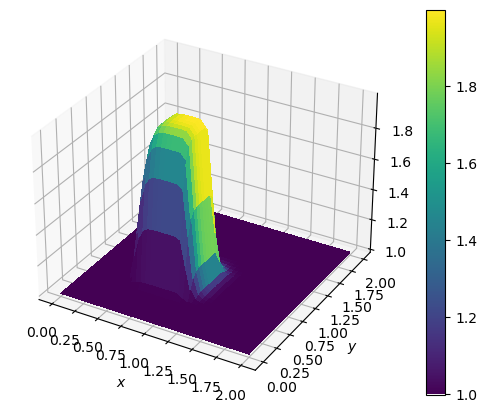

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# 条件設定と初期状態の設定を行う部分は省略

# 関数diffuseにntを追加する
def diffuse(nt):
    # 既存の関数diffuseのコードをそのまま使う
    # ここでntは繰り返し回数であり、アニメーションの終了条件となります

    un = u.copy()
    vn = v.copy()

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                        dt / dx * un[1:-1, 1:-1] * 
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                        dt / dy * vn[1:-1, 1:-1] * 
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                        nu * dt / dx**2 * 
                        (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                        nu * dt / dy**2 * 
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                        dt / dx * un[1:-1, 1:-1] *
                        (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        dt / dy * vn[1:-1, 1:-1] * 
                        (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                        nu * dt / dx**2 * 
                        (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        nu * dt / dy**2 *
                        (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))
        
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
        
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

    # グラフを更新
    surf.set_array(u[:-1, :-1].ravel())
    
# アニメーションを作成
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)

# カラーバーを設定
fig.colorbar(surf)

# アニメーションを作成するFuncAnimationオブジェクト
ani = FuncAnimation(fig, diffuse, frames=nt, interval=50)

# 動画を保存
ani.save('burgers_equation_animation.mp4', writer='ffmpeg', fps=30)

plt.show()


In [21]:
import os

# 現在のディレクトリを取得

cwd = os.getcwd()
print(cwd)

/Users/taku/Python
